In [22]:
import os
print("Current Working Directory:", os.getcwd())


Current Working Directory: /Users/aqibr/Documents/GitHub/intro_to_python_project/src


In [23]:
jetbluenew_df = pd.read_csv('../data/jetbluenew_df.csv')
model_encoded = pd.read_csv('../data/model_encoded_jetblue_df.csv')


In [24]:
print(jetbluenew_df.head())
print(model_encoded.head())


   searchDate    route  flightDate startingAirport destinationAirport  \
0  2022-04-16  ATL|EWR  2022-04-17             ATL                EWR   
1  2022-04-16  ATL|JFK  2022-04-17             ATL                JFK   
2  2022-04-16  ATL|JFK  2022-04-17             ATL                JFK   
3  2022-04-16  ATL|LGA  2022-04-17             ATL                LGA   
4  2022-04-16  ATL|LGA  2022-04-17             ATL                LGA   

  travelDuration  elapsedDays  isBasicEconomy  isRefundable  isNonStop  ...  \
0         PT2H9M            0           False         False       True  ...   
1        PT2H15M            0           False         False       True  ...   
2        PT2H23M            0           False         False       True  ...   
3        PT2H16M            0           False         False       True  ...   
4        PT2H19M            0           False         False       True  ...   

   segmentsDepartureAirportCode  segmentsAirlineName  \
0                           AT

In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

combined_df = pd.concat([jetbluenew_df, model_encoded], axis=1)

niche_encoding_filter = [
    "searchDayOfWeek", 
    "flightDayOfWeek", 
    "segmentsAirlineName"
]
combined_df.drop(columns=niche_encoding_filter, axis=1, inplace=True)

X = combined_df.select_dtypes(include=['number']).drop(columns=['totalFare'])  # Features
y = combined_df['totalFare']  # Target variable

X.fillna(0, inplace=True)
y.fillna(0, inplace=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Performance:")
print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)

coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)
print("\nFeature Coefficients:")
print(coefficients)









Model Performance:
Mean Squared Error (MSE): 2.2683261326994293
R-squared (R²): 0.9999104105342594

Feature Coefficients:
                                         Feature   Coefficient
9                     arrivalCategory_Late night  9.129323e+06
8                        arrivalCategory_Evening  9.129323e+06
6                      arrivalCategory_Afternoon  9.129323e+06
10                       arrivalCategory_Morning  9.129323e+06
7                  arrivalCategory_Early Morning  9.129323e+06
11                          arrivalCategory_Noon  9.129323e+06
46                           startingAirport_LGA  7.666029e+06
44                           startingAirport_JFK  7.666029e+06
43                           startingAirport_EWR  7.666029e+06
45                           startingAirport_LAX  7.666028e+06
38                           startingAirport_BOS  7.666028e+06
39                           startingAirport_CLT  7.666028e+06
40                           startingAirport_DEN  7.666028

How do departure and arrival times affect the totalFare?

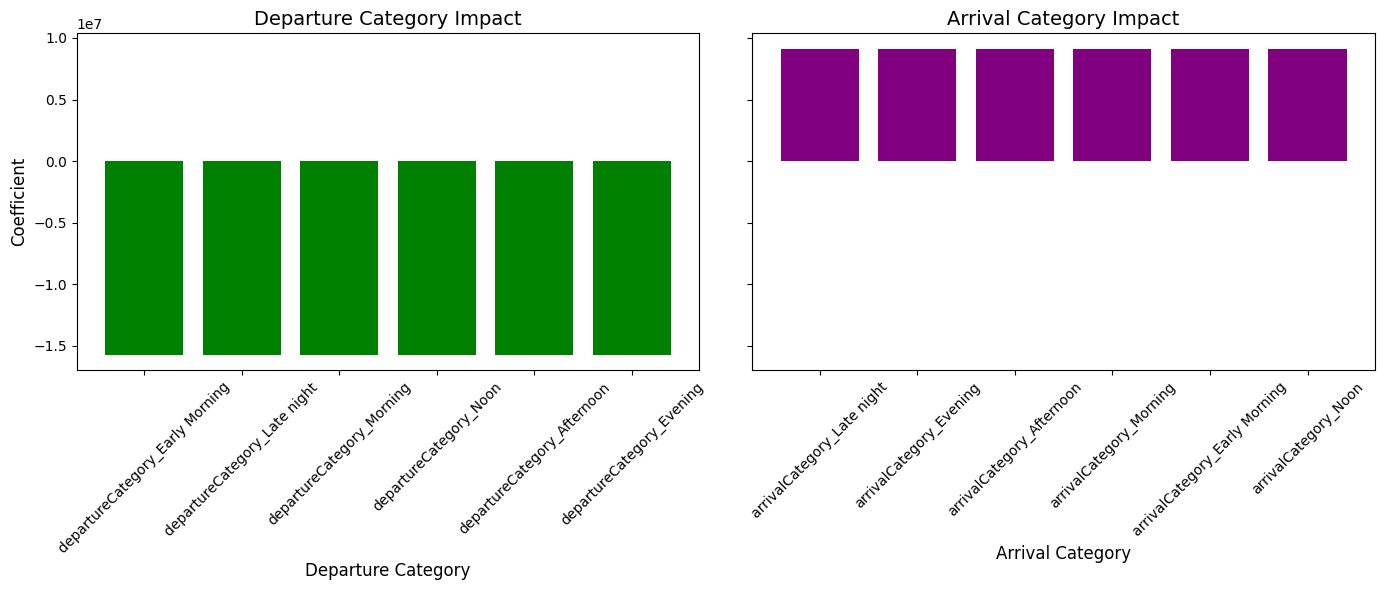

In [40]:
departure_features = coefficients[coefficients['Feature'].str.contains('departureCategory')]
arrival_features = coefficients[coefficients['Feature'].str.contains('arrivalCategory')]

fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

axes[0].bar(departure_features['Feature'], departure_features['Coefficient'], color='green')
axes[0].set_title('Departure Category Impact', fontsize=14)
axes[0].set_xlabel('Departure Category', fontsize=12)
axes[0].set_ylabel('Coefficient', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)

axes[1].bar(arrival_features['Feature'], arrival_features['Coefficient'], color='purple')
axes[1].set_title('Arrival Category Impact', fontsize=14)
axes[1].set_xlabel('Arrival Category', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


In [ ]:
Does flight duration (segmentsDurationInSeconds) correlate with higher fares?

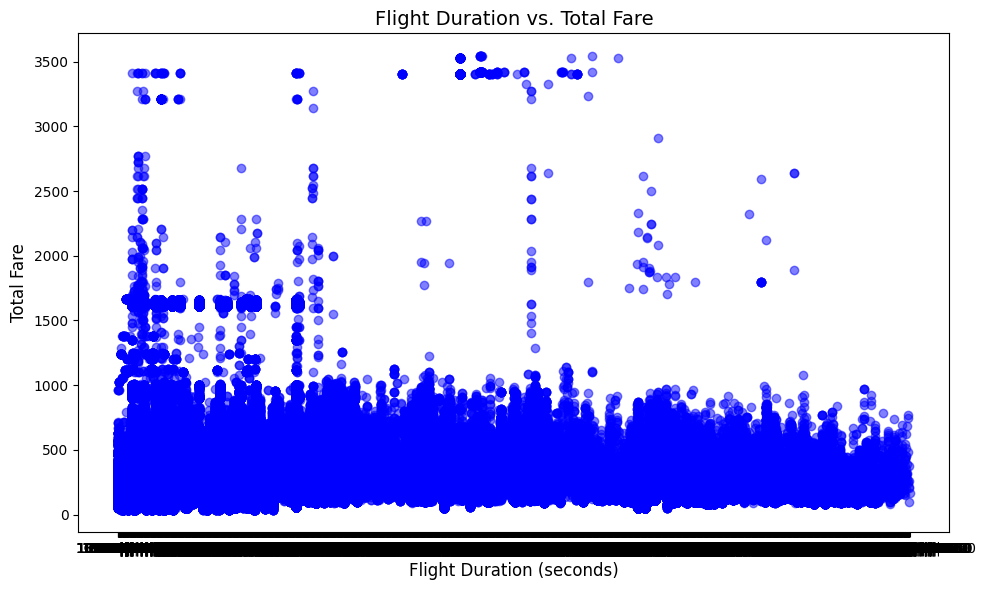

In [41]:
plt.figure(figsize=(10, 6))
plt.scatter(combined_df['segmentsDurationInSeconds'], combined_df['totalFare'], alpha=0.5, color='blue')
plt.title('Flight Duration vs. Total Fare', fontsize=14)
plt.xlabel('Flight Duration (seconds)', fontsize=12)
plt.ylabel('Total Fare', fontsize=12)
plt.tight_layout()
plt.show()


How does the booking window (elapsedDays) affect flight fares (totalFare) for flights departing from New York metro area airports?

/var/folders/4x/brsp5z3s5vddy1gyd3v5g93w0000gn/T/ipykernel_3398/2173371039.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ny_data['elapsedDays'].fillna(0, inplace=True)
/var/folders/4x/brsp5z3s5vddy1gyd3v5g93w0000gn/T/ipykernel_3398/2173371039.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ny_data['elapsedDays'].fillna(0, inplace=Tru

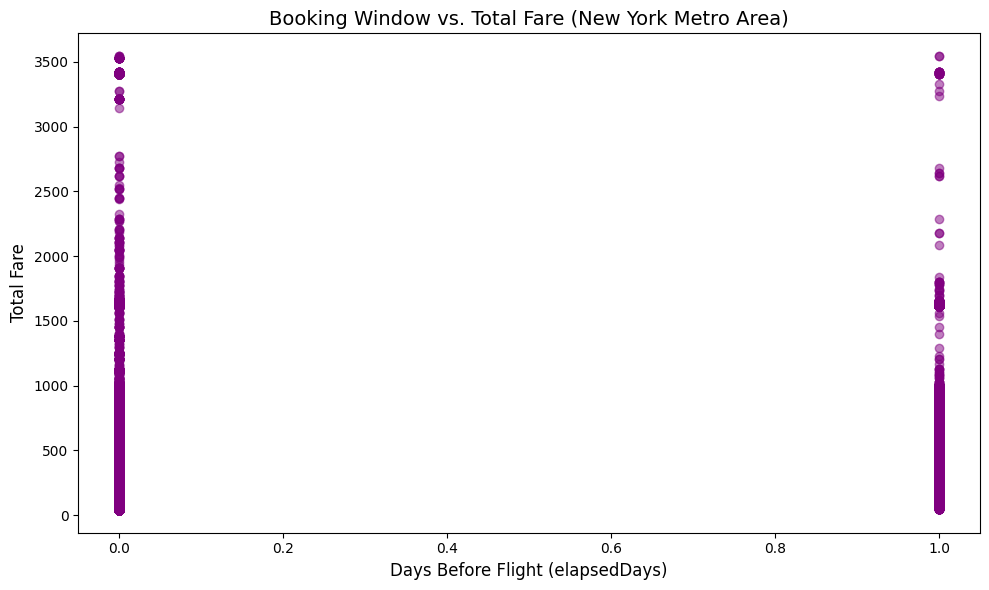

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

ny_data = combined_df[
    combined_df[['startingAirport_LGA', 'startingAirport_JFK', 'startingAirport_EWR']].sum(axis=1) > 0
]

ny_data['elapsedDays'].fillna(0, inplace=True)
ny_data['totalFare'].fillna(0, inplace=True)

plt.figure(figsize=(10, 6))
plt.scatter(ny_data['elapsedDays'], ny_data['totalFare'], alpha=0.5, color='purple')
plt.title('Booking Window vs. Total Fare (New York Metro Area)', fontsize=14)
plt.xlabel('Days Before Flight (elapsedDays)', fontsize=12)
plt.ylabel('Total Fare', fontsize=12)
plt.tight_layout()
plt.show()

